In [178]:
from sacla import *

In [177]:
!ls /work/gorkhover/H5/TAIS2019

782533.h5  logs  standard  Tags


In [179]:
1

1

In [175]:
198131/30/60

110.07277777777777

In [167]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

def diffdist(*args):
    accum=0
    for arg in args: accum+=np.diff(arg)**2
    return np.sqrt(accum)

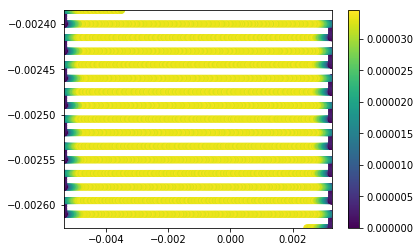

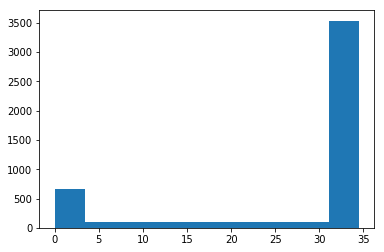

1.4999881386756897e-05


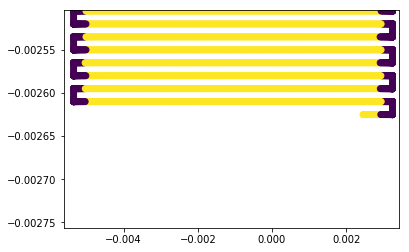

In [26]:
p=plt.scatter(r.sampleX[:-1],r.sampleZ[:-1],c=diffdist(r.sampleX,r.sampleZ))
plt.colorbar()
plt.xlim([np.min(r.sampleX),np.max(r.sampleX)])
plt.ylim([np.min(r.sampleZ),np.max(r.sampleZ)])
plt.show()
plt.hist(1e6*diffdist(r.sampleX))
plt.show()
print(np.percentile(diffdist(r.sampleX),20))

setdist=np.percentile(diffdist(r.sampleX),80)
mindist=setdist*0.8

distok=diffdist(r.sampleX)>mindist
p=plt.scatter(r.sampleX[:-1],r.sampleZ[:-1],c=distok)
plt.xlim([1.05*np.min(r.sampleX),1.05*np.max(r.sampleX)])
plt.ylim([1.05*np.min(r.sampleZ),1.05*np.max(r.sampleZ)])
plt.show()

In [127]:
import functools


@asgen
def photons(img,photonadu,gain=1,thres=0.6):
    p=gain*np.squeeze(np.asarray(img))/photonadu
    p1=(np.trunc(p))#.astype(int)
    p=p-p1
    p2=(p>thres)#.astype(int)
    return p1+p2

@functools.lru_cache()
def intensities(detector):
    @asgen
    def intensity(img):
        return np.sum(img)
    return detector.absolute_gain*3.65*np.array(list(intensity(detector)))


# @functools.lru_cache(maxsize=2)
# def intensities(detector):
#     return detector.absolute_gain*3.65*np.array(list(intensity(detector)))

# @functools.lru_cache(maxsize=2)
def nphotons(detector,energy):
    return np.array(list(intensity(photons(detector,photonadu=energy/(3.65*detector.absolute_gain),thres=0.6))))

In [43]:
all=slice(0,None)
low=slice(0,2500)
high=slice(2500,None)
t=intensities(r.detector_2d_3)

# intok=np.logical_and(t>np.percentile(t,2),t<np.percentile(t,98))


In [55]:
cur=all
maxint=np.percentile(t[cur],99)
intok=np.logical_and(t[cur]>maxint-np.std(t[cur]),t[cur]<maxint+np.std(t[cur]))
intok=np.logical_and(t>np.percentile(t[intok],2),t<np.percentile(t[intok],98))

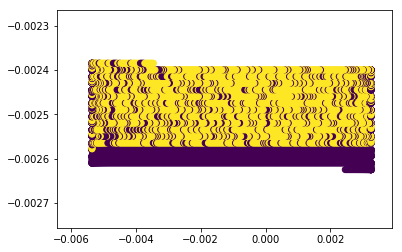

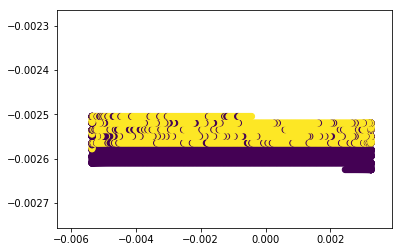

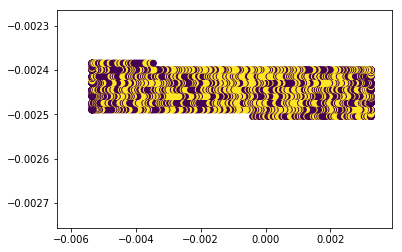

In [65]:
for cur in [all,low,high]:
    maxint=np.percentile(t[cur],95)
    intok=(t[cur]>(maxint-2*np.std(t[cur])))
#     intok=np.logical_and(t[cur]>np.percentile(t[cur][intok],2),t[cur]<np.percentile(t[cur][intok],98))
    p=plt.scatter(r.sampleX[cur],r.sampleZ[cur],c=intok)
    plt.xlim([np.min(r.sampleX)-0.2*abs(np.min(r.sampleX)),np.max(r.sampleX)+0.2*abs(np.max(r.sampleX))])
    plt.ylim([np.min(r.sampleZ)-0.05*abs(np.min(r.sampleZ)),np.max(r.sampleZ)+0.05*abs(np.max(r.sampleZ))])
    plt.show()

In [9]:
dist=diffdist(r.sampleX,r.sampleZ)

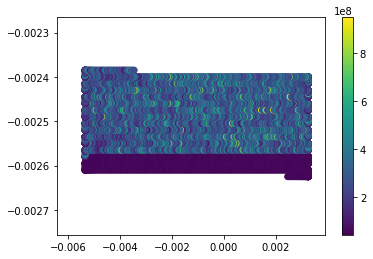

In [16]:
p=plt.scatter(r.sampleX,r.sampleZ,c=intensities(r.detector_2d_3))
plt.xlim([np.min(r.sampleX)-0.2*abs(np.min(r.sampleX)),np.max(r.sampleX)+0.2*abs(np.max(r.sampleX))])
plt.ylim([np.min(r.sampleZ)-0.05*abs(np.min(r.sampleZ)),np.max(r.sampleZ)+0.05*abs(np.max(r.sampleZ))])
plt.colorbar()
plt.show()

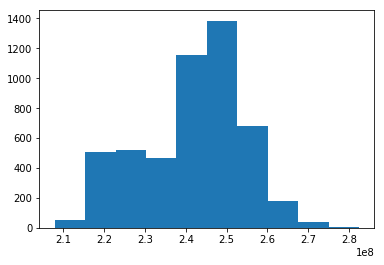

In [11]:
_= plt.hist(intensities(r.detector_2d_1))

(0.0, 3.6225031362846496e-05)

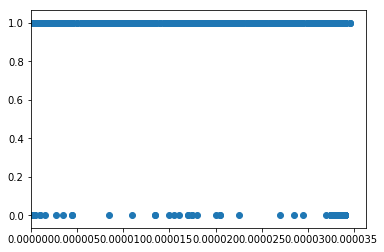

In [17]:
plt.scatter(dist,intok[:-1])
plt.xlim([np.min(dist),np.max(dist)*1.05])

In [120]:
ret=[]
x=np.arange(0.4,0.7,0.01)
for t in x:
    p=photons(r.detector_2d_3,6400/r.detector_2d_1.absolute_gain/3.65,t)
    tmp=[]
    for i,img in enumerate(p):
        if i<200: continue
        tmp.append((np.sum(img>1)/np.sum(img>-1)) / (np.sum(img==1)/np.sum(img>-1))**2)
        if i>500: break
    ret.append(np.array(tmp))

In [133]:
p=photons(r.detector_2d_3,6400/r.detector_2d_3.absolute_gain/3.65)


In [144]:
%%prun
p=photons(r.detector_2d_assembled_1,6400/r.detector_2d_assembled_1.absolute_gain/3.65)
dual=[np.sum(cp) for cp in p]

         510116 function calls (500116 primitive calls) in 123.226 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     5000   86.566    0.017   87.023    0.017 dataset.py:710(read_direct)
     5000   20.833    0.004  111.632    0.022 <ipython-input-127-e30265ef6cc2>:4(photons)
     5001    7.340    0.001    7.788    0.002 group.py:253(__getitem__)
    15002    3.436    0.000    3.436    0.000 {method 'reduce' of 'numpy.ufunc' objects}
20000/10000    3.089    0.000   90.819    0.009 {built-in method numpy.array}
     5001    0.328    0.000    0.385    0.000 dataset.py:395(__init__)
     5001    0.233    0.000  119.862    0.024 funchelper.py:14(asgen_helper)
    15005    0.180    0.000    0.184    0.000 dataset.py:283(shape)
     5000    0.159    0.000    0.160    0.000 dataset.py:302(dtype)
     5000    0.139    0.000   87.675    0.018 dataset.py:760(__array__)
    10000    0.098    0.000    0.231    0.000 selections.py:272

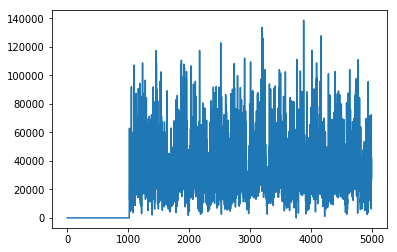

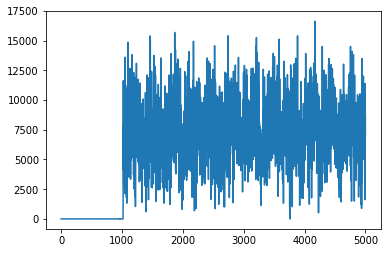

/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


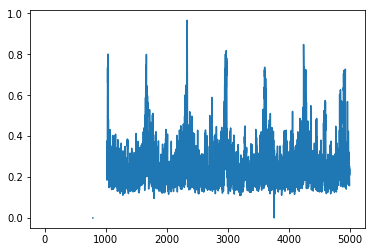

In [148]:
plt.plot(np.array(single))
plt.show()
plt.plot(np.array(dual))
plt.show()
plt.plot(np.array(dual/single))
plt.show()

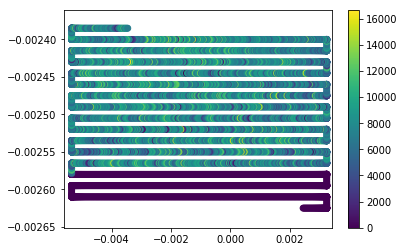

In [161]:
plt.scatter(r.sampleX,r.sampleZ,c=dual)
plt.xlim([np.min(r.sampleX)-0.05*abs(np.min(r.sampleX)),np.max(r.sampleX)+0.05*abs(np.max(r.sampleX))])
plt.ylim([np.min(r.sampleZ)-0.01*abs(np.min(r.sampleZ)),np.max(r.sampleZ)+0.01*abs(np.max(r.sampleZ))])
plt.colorbar()
plt.show()

In [160]:
[np.min(r.sampleZ)-0.05*abs(np.min(r.sampleZ)),np.max(r.sampleZ)+0.05*abs(np.max(r.sampleZ))]

[-0.002625, -0.002385]

In [132]:
%prun test()


         9906 function calls (9702 primitive calls) in 0.292 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      102    0.164    0.002    0.271    0.003 <ipython-input-127-e30265ef6cc2>:4(photons)
      102    0.059    0.001    0.067    0.001 dataset.py:710(read_direct)
  408/204    0.028    0.000    0.107    0.001 {built-in method numpy.array}
      103    0.007    0.000    0.013    0.000 group.py:253(__getitem__)
      103    0.005    0.000    0.006    0.000 dataset.py:395(__init__)
      103    0.004    0.000    0.291    0.003 funchelper.py:14(asgen_helper)
      311    0.003    0.000    0.003    0.000 dataset.py:283(shape)
      206    0.003    0.000    0.003    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      102    0.003    0.000    0.003    0.000 dataset.py:302(dtype)
      102    0.002    0.000    0.078    0.001 dataset.py:760(__array__)
      204    0.002    0.000    0.004    0.000 selections.py:272(broadca

In [122]:
p.__iter__

<method-wrapper '__iter__' of generator object at 0x7f3f4418d4f8>

In [109]:
%%prun
t=np.copy(tmp)      
p1=(np.trunc(t))
t=t-p1
p2=(t>thres)
ret=p1+p2

         5 function calls in 0.009 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.008    0.008    0.009    0.009 <string>:2(<module>)
        1    0.001    0.001    0.001    0.001 {built-in method numpy.array}
        1    0.000    0.000    0.009    0.009 {built-in method builtins.exec}
        1    0.000    0.000    0.001    0.001 function_base.py:747(copy)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [110]:
ret.dtype

dtype('float64')

In [165]:
commands=['a']
f'''
    #PBS -V
    #PBS -l nodes=1:ppn=14
    #PBS -l walltime=24:00:00
    #PBS -l mem=60GB
    {c for c in commands}
    '''

'\n    #PBS -V\n    #PBS -l nodes=1:ppn=14\n    #PBS -l walltime=24:00:00\n    #PBS -l mem=60GB\n    <generator object <genexpr> at 0x7f3f441a5390>\n    '

In [ ]:
r=